#### 강아지와 기정떡 구분하기
1. 데이터 수집 : 강아지와 기정떡 데이터 수집하기.
2. 데이터 전처리 : 사진 불러오기 (사진 크기 조절,  정규화)
3. 데이터 분할 : 학습, 검증 및 테스트 데이터셋으로 나누기.
4. 모델 설계 :
5. 모델 학습 :
6. 모델 평가 :
7. 모델 테스트 : 

In [23]:
# 모듈 불러오기.

import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary
import torchvision
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[1] 데이터 전처리

In [24]:
# 이미지 전처리 시 사용
preprocessing = transforms.Compose(
    [transforms.Resize(size=(64, 64)), # 사이즈 조정 64 * 64
    transforms.ToTensor(), # 텐서로 변환
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))] # 정규화
)

[1-1] 이미지 불러오기

In [25]:
# 폴더 경로 설정
train = '../train/' # 학습용 데이터 경로 설정
test = '../test/' # 테스트용 데이터 경로 설정

os.path.isdir(train), os.path.isdir(test) # 경로 맞는지 확인
# valid = '../vaild/' # 검증용 데이터 경로 설정
# os.path.isdir(valid)

(True, True, True)

In [26]:

# 폴더 열기 (type : torchvision.datasets.folder.ImageFolder)
#valFolder = ImageFolder(root=valid, transform=preprocessing)

from torchvision.datasets import ImageFolder

imgFolder = ImageFolder(root=train, transform=preprocessing)
testFolder = ImageFolder(root=test, transform=preprocessing)
imgFolder.classes, testFolder.classes

(['Bichon', 'zangidduk'], ['bichon', 'zangidduk'])

In [27]:
#valDL = DataLoader(valFolder, batch_size=8, shuffle=True)

from torch.utils.data import DataLoader

# 학습용, 검증용, 테스트용 데이터 로더 생성
imgDL = DataLoader(imgFolder, batch_size=8, shuffle=True)
testDL = DataLoader(testFolder, batch_size=8, shuffle=True)

#  플래그 변수를 이용하여 첫 번째 이미지와 라벨을 저장하고, 
# 이후에는 이미지와 라벨을 출력하는 구문

flag=0 # 플래그 변수 생성, 첫번째 이미지와 라벨 저장.
img2=np.array([0]) # 첫 번째 이미지를 저장할 빈 배열 생성
label2=np.array([0]) # 첫 번째 라벨을 저장할 빈 배열을 생성
for (img, label) in imgDL : #이미지와 라벨을 반복해서 가져오는 문장.  
    if not flag: # 플래그 변수가 0일 때 (즉, 아직 첫 번째 이미지와 라벨을 가져오지 않았을 때) 실행됩니다.
        img2, label2 = img, label # 첫 번째 이미지와 라벨을 img2와 label2에 저장합니다.
        flag=1 # 플래그 변수를 1로 설정하여 더 이상 첫 번째 이미지와 라벨을 가져오지 않도록 합니다.
    print(img.shape, label.shape, label) # 현재 가져온 이미지의 크기와 라벨을 출력합니다.

torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 0, 1, 0, 0, 0, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 1, 1, 0, 0, 1, 1, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 0, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 0, 1, 1, 0, 0, 1, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 0, 1, 1, 0, 0, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 1, 1, 1, 0, 0, 1, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 1, 0, 1, 0, 1, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 1, 1, 1, 0, 0, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 0, 0, 1, 0, 1, 0, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 1, 0, 0, 1, 1, 1, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 0, 0, 0, 0, 1, 1, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 1, 1, 1, 1, 0, 1, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 0, 1, 0, 0, 1, 0, 0])


torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 1, 1, 0, 1, 0, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 1, 1, 1, 1, 1, 1, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 1, 0, 0, 0, 0, 1, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 0, 0, 0, 1, 1, 1, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 0, 0, 0, 1, 1, 1, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 1, 1, 1, 1, 0, 1, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 1, 0, 0, 0, 0, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 0, 1, 1, 0, 1, 0, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 1, 1, 0, 1, 1, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 0, 1, 0, 0, 0, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 0, 0, 0, 1, 1, 0, 1])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([0, 0, 1, 0, 1, 1, 0, 0])
torch.Size([8, 3, 64, 64]) torch.Size([8]) tensor([1, 1, 0, 0, 0, 0, 1, 0])
torch.Size([

In [28]:
img.shape

torch.Size([2, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


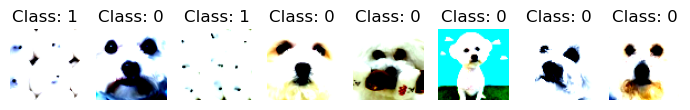

In [29]:
pltsize = 2 # pltsize = 2은 subplot을 표시할 때 사용할 figure의 크기를 조정하는 데 사용
plt.figure(figsize=(7, pltsize))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.axis("off")
    plt.imshow(np.transpose(img2[i], (1, 2, 0)))
    plt.title("Class: " + str(label2[i].item())) 
plt.tight_layout()
plt.show()

In [30]:
# 커널 ( 64*64일때 커널이 3이면 64-(3-1) = 62개)
#31-(3-1) = 31-3(커널사이즈)+1 = 29

class CNN(nn.Module) :
    def __init__(self) : # 모델의 구조를 정의 후, 초기화
        super().__init__() # 부모 클래스인 nn.Module의 초기화 메서드를 호출
        self.conLayer = nn.Conv2d(in_channels=3, out_channels=25, kernel_size = 3, ) # 합성곱 레이어1 정의
        self.conLayer2 = nn.Conv2d(in_channels=25, out_channels=10, kernel_size = 3) # 합성곱 레이어2 정의
        self.pool1 = nn.MaxPool2d(2, 2) 
        self.fc1 = nn.Linear(10*14*14, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 250)
        self.fc4 = nn.Linear(250, 125)
        self.fc5 = nn.Linear(125, 60)
        self.fc6 = nn.Linear(60, 2)

    def forward(self, x) :
        x = self.conLayer(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conLayer2(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = x.view(-1, 10*14*14) 
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        x = F.relu(x)        
        x = self.fc6(x)

        return x

[5] 학습 준비

In [31]:
# 실행 디바이스 실행.
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

mdl = CNN().to(DEVICE)

In [32]:
# 최적화 인스턴스 생성 => 모델에서 사용하는 w와 b 변수들 전달 
optimizer=optim.AdamW(mdl.parameters()) 

In [33]:
import torchmetrics.functional as metrics
from torchmetrics.functional.classification import multiclass_accuracy
from torch.optim import lr_scheduler

scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

def training() :
        mdl.train()
        for idx, (feature, target) in enumerate(imgDL) :
                feature, target = feature.to(DEVICE), target.to(DEVICE)

                # 학습
                pre_y = mdl(feature)
                pre_y2 = F.sigmoid(pre_y)

                # 손실 계산
                #print(f"손실함수 계산 전 shape 확인 => pre_y2 : {pre_y2.shape}  target : {target.shape}")

                target = target.unsqueeze(1).expand(-1, 2).float() # 돌아는 가는데 뭔가 잘못됨.
                loss = F.binary_cross_entropy(pre_y2, target)

                # w, b 업데이트
                optimizer.zero_grad()
                loss.backward()  # 손실함수 계산값으로 미분 진행하여 새로운 W, b 계산
                optimizer.step() # 새로운 값으로 W, b 업데이트
                
                # 스케줄러 업데이트
                scheduler.step()
                current_lr = scheduler.get_last_lr()[0]
                print()
                
                # 정확도
                accuracy = metrics.accuracy(pre_y2, target, task = 'binary')
                recall = metrics.precision(pre_y2, target, task = 'binary')
                multi_accuracy = multiclass_accuracy(pre_y2, target, num_classes=2)
                # multicalss_accuracy = 모델의 예측과 실제 레이블을 비교하여 올바르게 분류된 샘플의 비율을 계산
        
        return loss.item(), accuracy, recall, multi_accuracy, target

In [34]:
EPOCHS = 100
loss_list = []
mul_acc_list = []
recall_list = []

for ep in range(EPOCHS):
    sample = []
    train_loss, accuracy, recall, train_multi_accuracy, current_lr = training()
    print(f"ep [{ep+1}] loss : {train_loss}")
    print(f"accuracy : {accuracy}")
    print(f'recall : {recall}')
    print(f'multiclass accuracy : {train_multi_accuracy}')   
    loss_list.append(train_loss)
    recall_list.append(recall)
    mul_acc_list.append(train_multi_accuracy)





































ep [1] loss : 0.6895338892936707
accuracy : 0.5
recall : 0.0
multiclass accuracy : 1.0












































ep [2] loss : 0.6888388395309448
accuracy : 0.5
recall : 0.0
multiclass accuracy : 1.0












































ep [3] loss : 0.6891979575157166
accuracy : 0.5
recall : 0.0
multiclass accuracy : 1.0












































ep [4] loss : 0.6937544941902161
accuracy : 0.5
recall : 0.5
multiclass accuracy : 0.5












































ep [5] loss : 0.6890366077423096
accuracy : 0.5
recall : 0.0
multiclass accuracy : 1.0












































ep [6] loss : 0.6934501528739929
accuracy : 0.5
recall : 0.5
multiclass accuracy : 0.5












































ep [7] loss : 0.6894208192825317
accuracy : 0.5
recall : 0.0
multiclass accuracy : 1.0












































ep [8] loss : 0.6893811225891113
accuracy : 0.5

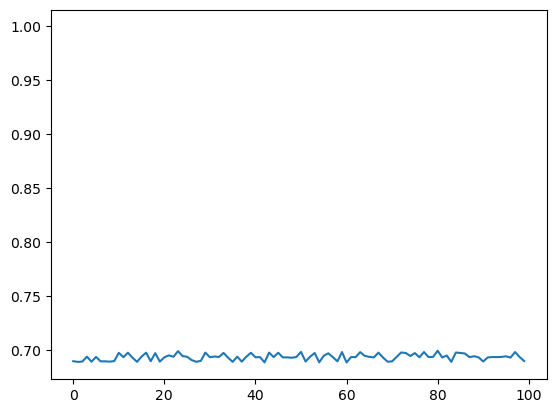

In [35]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.plot(train_multi_accuracy)
plt.show()

In [36]:
def get_accuracy(loader, model):
    total=0
    correct=0
    for data in loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return correct / total

In [37]:
get_accuracy(imgDL, mdl)

0.5260115606936416

In [38]:
# def Val(valDL) :
#     mdl.eval()
#     with torch.no_grad() :
#         lossList = []
#         for i, (feature, target) in enumerate(valDL) :
#             feature, target = feature.to(DEVICE), target.to(DEVICE)

#             # 학습 
#             pre_yval = mdl(feature)

#             pre_yval2 = F.sigmoid(pre_yval)

#             #print(f"손실함수 계산 전 shape 확인 => pre_yval2 : {pre_yval2.shape}  target : {target.shape}")
#             target = target.unsqueeze(dim=1).expand(-1,2).float()
#             loss = F.binary_cross_entropy(pre_yval2, target) # (예측값, 정답)
#             lossList.append(loss.item())
#             val_accuracy = metrics.accuracy(pre_yval2, target, task = 'binary')
#             # target.shape[0] ==> 뭔가 잘못됨.
#             # val_accuracy = ((target == (pre_yval2 >= 0.5)).sum()).item() / (target.shape[0] * target.shape[1])
#             # 예측값이 0.5보다 클 때의 정답의 값을 더한 것 
#     return lossList, val_accuracy

# loss_list_val = []
# acc_list_val = []

# for ep in range(8):
#     val_loss, val_accuracy = Val(valDL)
#     print(f"ep [{ep+1}] val_loss: {val_loss[ep]}, val_accuracy: {val_accuracy}")
#     loss_list_val.append(val_loss)
#     acc_list_val.append(val_accuracy)

In [39]:
# get_accuracy(valDL, mdl)

In [40]:
def test() :
    mdl.eval()
    with torch.no_grad():
        loss_list=[]
        for i, (feature, target) in enumerate(testDL) :
            feature, target = feature.to(DEVICE), target.to(DEVICE)

            pre_ytst = mdl(feature)
            # 분류값 변화
            pre_ytst2 = F.sigmoid(pre_ytst)

                
            # 오차 즉 손실 계산
            #print(f"손실함수 계산 전 shape 확인 => pre_y2 : {pre_ytst2.shape}  target : {target.shape}")
            #pre_ytst2 = pre_ytst2.unsqueeze(dim=1)
            target = target.unsqueeze(dim=1).expand(-1,2).float()
            loss = F.binary_cross_entropy(pre_ytst2, target) # (예측값, 정답)
            loss_list.append(loss.item())
            #print(f'[{idx+1}] Loss => {loss}')
            
            
            # 정확도 계산 => 예측값을 0과 1로 변환 ==> 정답과 비교
            test_accuracy = ((target == (pre_ytst2 >= 0.5)).sum()).item() / (target.shape[0] * target.shape[1])
            # 예측값이 0.5보다 클 때의 정답의 값을 더한 것 / 60000
        return loss_list, test_accuracy


loss_list_tst = []
acc_list_tst = []
for ep in range(10):
    tst_loss, tst_accuracy= test()
    print(f"ep [{ep+1}] loss : {tst_loss[ep]}, test_accuracy : {tst_accuracy}")
    loss_list_tst.append(tst_loss)
    acc_list_tst.append(tst_accuracy)

ep [1] loss : 0.6942085027694702, test_accuracy : 0.5
ep [2] loss : 0.6957532167434692, test_accuracy : 0.5
ep [3] loss : 0.6956683397293091, test_accuracy : 0.5
ep [4] loss : 0.6928414702415466, test_accuracy : 0.5
ep [5] loss : 0.6924190521240234, test_accuracy : 0.5
ep [6] loss : 0.6946255564689636, test_accuracy : 0.5
ep [7] loss : 0.6945240497589111, test_accuracy : 0.5625
ep [8] loss : 0.6934922933578491, test_accuracy : 0.5
ep [9] loss : 0.6910094618797302, test_accuracy : 0.5
ep [10] loss : 0.6947305202484131, test_accuracy : 0.5


In [41]:
get_accuracy(testDL, mdl)

0.4875

In [42]:
torch.save(mdl, 'model.pth')

In [44]:
# x=imgDL.to(DEVICE)
# y=mdl(x)
# from torchviz import make_dot

# make_dot(target.mean(), params=dict(mdl.named_parameters()))